**Project Description:**
Problem statement: Create a classification model to predict the gender (male or 
female) based on different acoustic parameters


**Context**: This database was created to identify a voice as male or female, based upon 
acoustic properties of the voice and speech. The dataset consists of 3,168 recorded 
voice samples, collected from male and female speakers. The voice samples are preprocessed by acoustic analysis in R using the seewave and tuneR packages, with an 
analyzed frequency range of 0hz-280hz (human vocal range).

In [3]:
#library packages
import numpy as np
import pandas as pd

In [31]:
#read the data
data=pd.read_csv("/content/voice.csv")
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [13]:
data.isna().sum()

meanfreq        0
sd              0
median          0
Q25             0
Q75             0
IQR             0
skew            0
kurt            0
sp.ent          0
sfm             0
mode            0
centroid        0
meanfun         0
minfun          0
maxfun          0
meandom         0
mindom          0
maxdom          0
dfrange         0
modindx         0
label           0
Product Type    0
dtype: int64

In [30]:
#1)Remove/handle null values (if any)
data.dropna()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,Product Type
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0,0


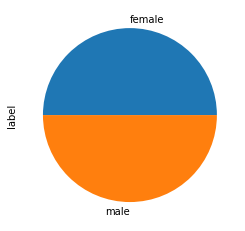

In [32]:
#2)Depict percentage distribution of label on a pie chart
import matplotlib.pyplot as plt
data.groupby('label').label.count().plot(kind='pie')
plt.show()

In [33]:
#3)Considering all the features as independent feature and label as dependent feature,
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['label']= label_encoder.fit_transform(data['label'])

data['label'].unique()


array([1, 0])

In [11]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,Product Type
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0,0


In [19]:
x = data.drop(['label'], axis=1)
y = data['label']

**DecisionTreeClassifier**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [21]:
model=DecisionTreeClassifier()

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [23]:
model.fit(x_train,y_train)
pre=model.predict(x_test)


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
print(accuracy_score(y_test,pre))

1.0


In [26]:
print(confusion_matrix(y_test,pre))

[[301   0]
 [  0 333]]


**RandomForestClassifier**

In [44]:
from sklearn.ensemble import RandomForestClassifier
#fitting the data to the model
model1 = RandomForestClassifier()
model1.fit(x_train,y_train)
#predicting the model
pre1 = model1.predict(x_test)


In [45]:
#accuracy of the model
accuracy_score(y_test,pre1)

1.0

In [46]:
#confusion matrix of the model
confusion_matrix(y_test,pre1)

array([[301,   0],
       [  0, 333]])

In [47]:
#classification report 
z = classification_report(y_test,pre1)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       333

    accuracy                           1.00       634
   macro avg       1.00      1.00      1.00       634
weighted avg       1.00      1.00      1.00       634



**Support Vector Machine**

In [48]:
from sklearn.svm import SVC
#fitting the data to the model
model3 = SVC()
model3.fit(x_train,y_train)
#predicting the model
pre2 = model3.predict(x_test)


In [49]:
#accuracy of the model
accuracy_score(y_test,pre2)

0.695583596214511

In [50]:
#confusion matrix of the model
confusion_matrix(y_test,pre1)

array([[301,   0],
       [  0, 333]])

In [52]:
#classification report 
z = classification_report(y_test,pre2)
print(z)

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       301
           1       0.68      0.79      0.73       333

    accuracy                           0.70       634
   macro avg       0.70      0.69      0.69       634
weighted avg       0.70      0.70      0.69       634



**KNeighborsClassifier**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
#fitting the data to the model
model4 = KNeighborsClassifier()
model4.fit(x_train,y_train)
#predicting the model
pre3 = model4.predict(x_test)

In [55]:
#accuracy of the model
accuracy_score(y_test,pre3)

0.9574132492113565

In [57]:
#confusion matrix of the model
confusion_matrix(y_test,pre3)

array([[290,  11],
       [ 16, 317]])

In [58]:
#classification report 
z = classification_report(y_test,pre3)
print(z)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       301
           1       0.97      0.95      0.96       333

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



**GaussianNB**

In [59]:
#Naivebayes package
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(x_train,y_train)
#predicting the model
pre4 = model5.predict(x_test)

In [60]:
#accuracy of the model
accuracy_score(y_test,pre4)

1.0

In [61]:
#confusion matrix of the model
confusion_matrix(y_test,pre4)

array([[301,   0],
       [  0, 333]])

In [62]:
#classification report 
z = classification_report(y_test,pre4)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       333

    accuracy                           1.00       634
   macro avg       1.00      1.00      1.00       634
weighted avg       1.00      1.00      1.00       634

